<a href="https://colab.research.google.com/github/farshadrashidi2022/farshad_INSE_6220/blob/main/Copy_of_Sample_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install PyCaret**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [75]:
# install slim version (default): if you get an error message, run it again one or more times: 
!pip3 install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

## **Principal Component Analysis**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

**Import Libraries**

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [78]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [79]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/farshadrashidi2022/farshad_INSE_6220/main/Farshad_Rashidi_Data_Set2.csv')
df.head(25)

MIP       SDIP      EKIP       SIP        MDS       SDDS  \
0   140.562500  55.683782 -0.234571 -0.699648   3.199833  19.110426   
1   102.507812  58.882430  0.465318 -0.515088   1.677258  14.860146   
2   103.015625  39.341649  0.323328  1.051164   3.121237  21.744669   
3   136.750000  57.178449 -0.068415 -0.636238   3.642977  20.959280   
4    88.726562  40.672225  0.600866  1.123492   1.178930  11.468720   
5    93.570312  46.698114  0.531905  0.416721   1.636288  14.545074   
6   119.484375  48.765059  0.031460 -0.112168   0.999164   9.279612   
7   130.382812  39.844056 -0.158323  0.389540   1.220736  14.378941   
8   107.250000  52.627078  0.452688  0.170347   2.331940  14.486853   
9   107.257812  39.496488  0.465882  1.162877   4.079431  24.980418   
10  142.078125  45.288073 -0.320328  0.283953   5.376254  29.009897   
11  133.257812  44.058244 -0.081060  0.115362   1.632107  12.007806   
12  134.960938  49.554327 -0.135304 -0.080470  10.696488  41.342044   
13  117.945312  45.506577  0.325438  0.661459   2.836120  23.118350   
14  138.179688  51.524484 -0.031852  0.046797   6.330268  31.576347   
15  114.367188  51.945716 -0.094499 -0.287984   2.738294  17.191891   
16  109.640625  49.017652  0.137636 -0.256700   1.508361  12.072901   
17  100.851562  51.743522  0.393837 -0.011241   2.841137  21.635778   
18  136.093750  51.691005 -0.045909 -0.271816   9.342809  38.096400   
19  100.890625  51.890394  0.627487 -0.026498   3.883779  23.045267   
20  105.445312  41.139969  0.142654  0.320420   3.551839  20.755017   
21   95.867188  42.059922  0.326387  0.803502   1.832776  12.248969   
22  117.367188  53.908614  0.257953 -0.405049   6.018395  24.766123   
23  106.648438  56.367182  0.378355 -0.266372   2.436455  18.405371   
24  112.718750  50.301270  0.279391 -0.129011   8.281773  37.810012   

         EKDS         SDS  class  
0    7.975532   74.242225      0  
1   10.576487  127.393580      0  
2    7.735822   63.171909      0  
3    6.896499   53.593661      0  
4   14.269573  252.567306      0  
5   10.621748  131.394004      0  
6   19.206230  479.756567      0  
7   13.539456  198.236457      0  
8    9.001004  107.972506      0  
9    7.397080   57.784738      0  
10   6.076266   37.831393      0  
11  11.972067  195.543448      0  
12   3.893934   14.131206      0  
13   8.943212   82.475592      0  
14   5.155940   26.143310      0  
15   9.050612   96.611903      0  
16  13.367926  223.438419      0  
17   8.302242   71.584369      0  
18   4.345438   18.673649      0  
19   6.953168   52.279440      0  
20   7.739552   68.519771      0  
21  11.249331  177.230771      0  
22   4.807783   25.522616      0  
23   9.378660   96.860225      0  
24   4.691827   21.276210      0

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MIP     250 non-null    float64
 1   SDIP    250 non-null    float64
 2   EKIP    250 non-null    float64
 3   SIP     250 non-null    float64
 4   MDS     250 non-null    float64
 5   SDDS    250 non-null    float64
 6   EKDS    250 non-null    float64
 7   SDS     250 non-null    float64
 8   class   250 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 17.7 KB


In [81]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

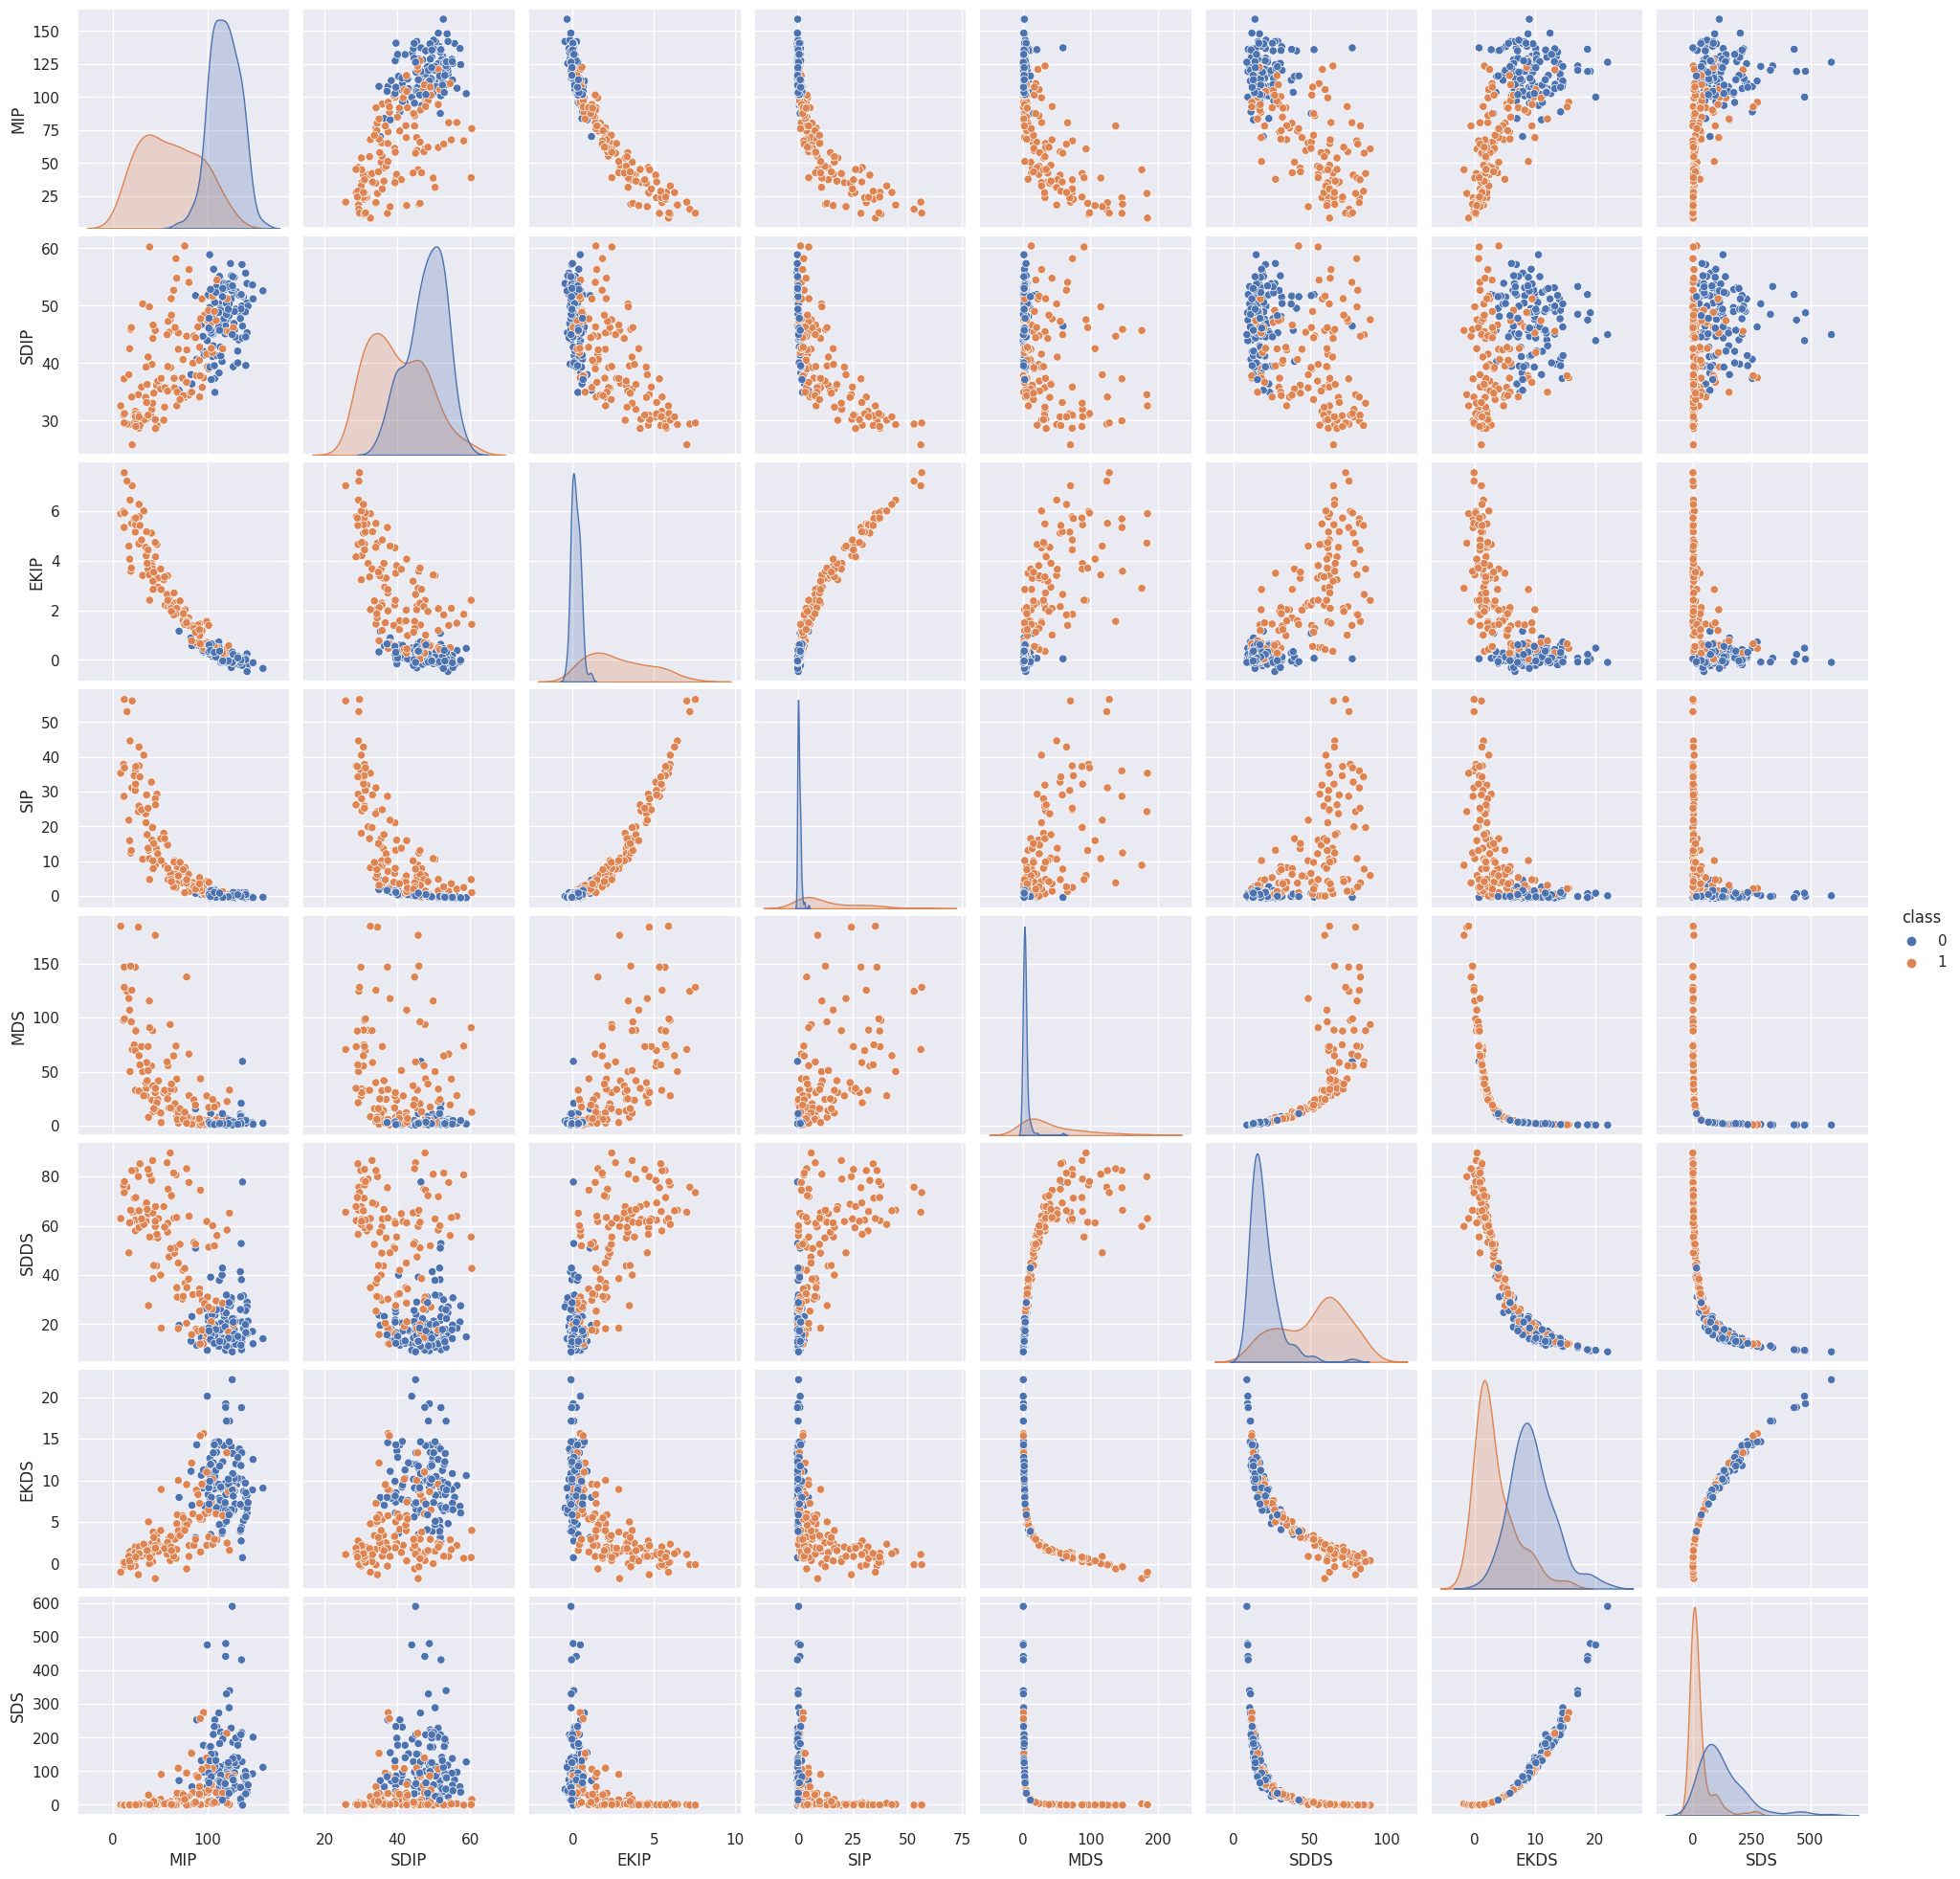

In [82]:
sns.pairplot(df, hue='class')
plt.show()

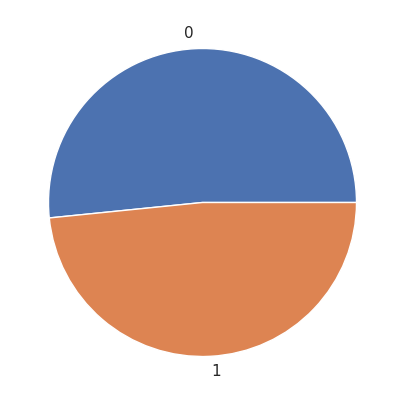

In [83]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [84]:
X = df.drop(columns=['class'])
X.head(10)

MIP       SDIP      EKIP       SIP       MDS       SDDS       EKDS  \
0  140.562500  55.683782 -0.234571 -0.699648  3.199833  19.110426   7.975532   
1  102.507812  58.882430  0.465318 -0.515088  1.677258  14.860146  10.576487   
2  103.015625  39.341649  0.323328  1.051164  3.121237  21.744669   7.735822   
3  136.750000  57.178449 -0.068415 -0.636238  3.642977  20.959280   6.896499   
4   88.726562  40.672225  0.600866  1.123492  1.178930  11.468720  14.269573   
5   93.570312  46.698114  0.531905  0.416721  1.636288  14.545074  10.621748   
6  119.484375  48.765059  0.031460 -0.112168  0.999164   9.279612  19.206230   
7  130.382812  39.844056 -0.158323  0.389540  1.220736  14.378941  13.539456   
8  107.250000  52.627078  0.452688  0.170347  2.331940  14.486853   9.001004   
9  107.257812  39.496488  0.465882  1.162877  4.079431  24.980418   7.397080   

          SDS  
0   74.242225  
1  127.393580  
2   63.171909  
3   53.593661  
4  252.567306  
5  131.394004  
6  479.756567  
7  198.236457  
8  107.972506  
9   57.784738

In [85]:
X.describe().transpose()

count       mean        std        min        25%         50%  \
MIP   250.0  90.500375  37.522222   8.226562  61.201172  102.007812   
SDIP  250.0  43.999368   7.794437  25.771711  37.795065   45.490831   
EKIP  250.0   1.469785   1.874230  -0.470773   0.140538    0.492895   
SIP   250.0   6.627745  11.648571  -0.699648  -0.019584    0.879586   
MDS   250.0  22.540482  36.605383   0.619565   2.307065    4.415134   
SDDS  250.0  35.772754  23.139047   8.818238  16.300297   26.213786   
EKDS  250.0   6.566122   4.722479  -1.785377   2.204350    6.467430   
SDS   250.0  75.681467  94.623036  -1.504341   3.769659   45.421773   

             75%         max  
MIP   119.794922  158.937500  
SDIP   49.930069   60.412942  
EKIP    2.270680    7.550922  
SIP     7.802033   56.537747  
MDS    27.592809  184.525920  
SDDS   58.151143   89.542258  
EKDS    9.611573   22.089638  
SDS   112.353251  590.258778

**Standardize the Data**

In [86]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

MIP      SDIP      EKIP       SIP       MDS      SDDS      EKDS  \
0  1.336876  1.502078 -0.911188 -0.630300 -0.529415 -0.721540  0.299046   
1  0.320651  1.913277 -0.537011 -0.614424 -0.571093 -0.905593  0.850911   
2  0.334211 -0.598768 -0.612922 -0.479696 -0.531567 -0.607468  0.248185   
3  1.235066  1.694224 -0.822356 -0.624845 -0.517285 -0.641478  0.070099   
4 -0.047368 -0.427717 -0.464544 -0.473474 -0.584734 -1.052454  1.634503   
5  0.081981  0.346935 -0.501412 -0.534270 -0.572214 -0.919237  0.860515   
6  0.773998  0.612649 -0.768961 -0.579765 -0.589655 -1.147251  2.681953   
7  1.065034 -0.534182 -0.870423 -0.536608 -0.583589 -0.926431  1.479588   
8  0.447288  1.109127 -0.543763 -0.555463 -0.553172 -0.921758  0.516628   
9  0.447496 -0.578863 -0.536709 -0.470086 -0.505338 -0.467348  0.176311   

        SDS  
0 -0.015241  
1  0.547603  
2 -0.132469  
3 -0.233898  
4  1.873124  
5  0.589965  
6  4.278934  
7  1.297790  
8  0.341944  
9 -0.189517

In [87]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
MIP   250.0 -1.136868e-16  1.002006 -2.197068 -0.782416  0.307298  0.782291   
SDIP  250.0 -2.273737e-16  1.002006 -2.343238 -0.797588  0.191734  0.762415   
EKIP  250.0  2.842171e-17  1.002006 -1.037466 -0.710646 -0.522268  0.428177   
SIP   250.0 -2.842171e-17  1.002006 -0.630300 -0.571801 -0.494455  0.101012   
MDS   250.0  5.684342e-17  1.002006 -0.600045 -0.553853 -0.496149  0.138298   
SDDS  250.0 -2.842171e-16  1.002006 -1.167230 -0.843229 -0.413939  0.969067   
EKDS  250.0 -2.842171e-17  1.002006 -1.772004 -0.925472 -0.020940  0.646178   
SDS   250.0  5.684342e-17  1.002006 -0.817355 -0.761507 -0.320434  0.388334   

           max  
MIP   1.827568  
SDIP  2.110031  
EKIP  3.251115  
SIP   4.293241  
MDS   4.434058  
SDDS  2.328418  
EKDS  3.293748  
SDS   5.449091

**Observations and variables**

In [88]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

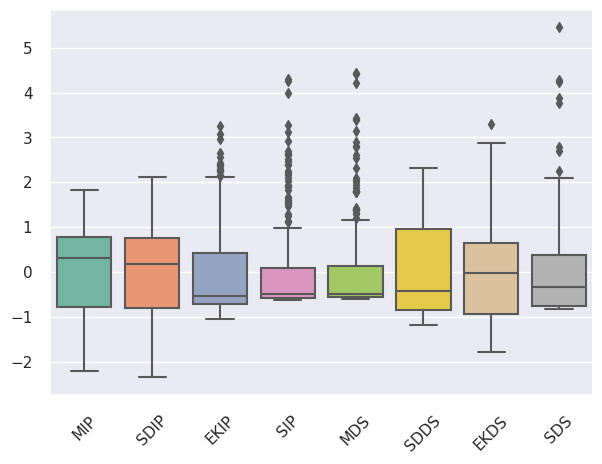

In [89]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

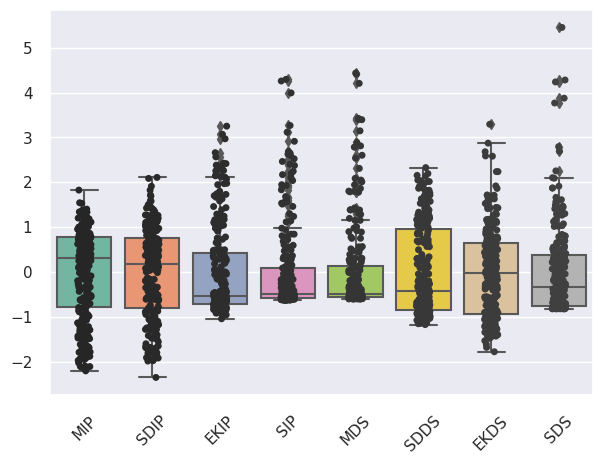

In [90]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

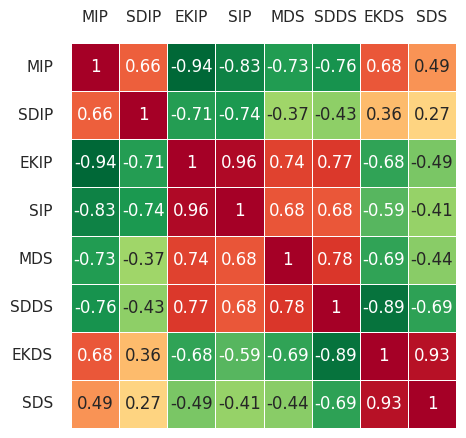

In [91]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Applying PCA**

Text(0, 0.5, '$Z_2$')

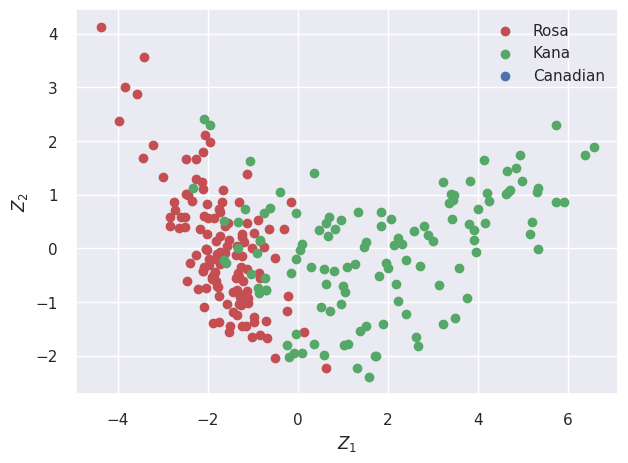

In [92]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

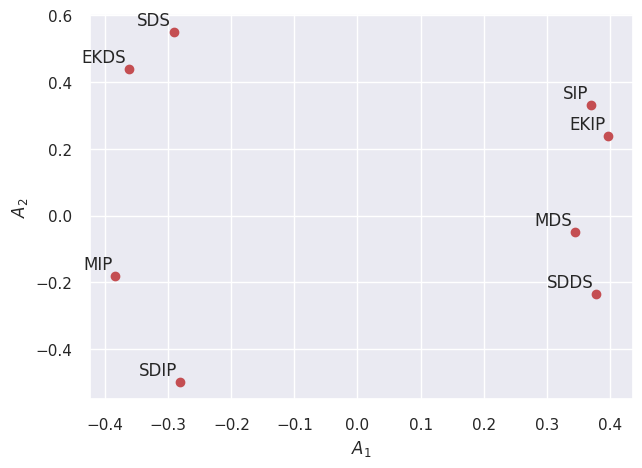

In [93]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

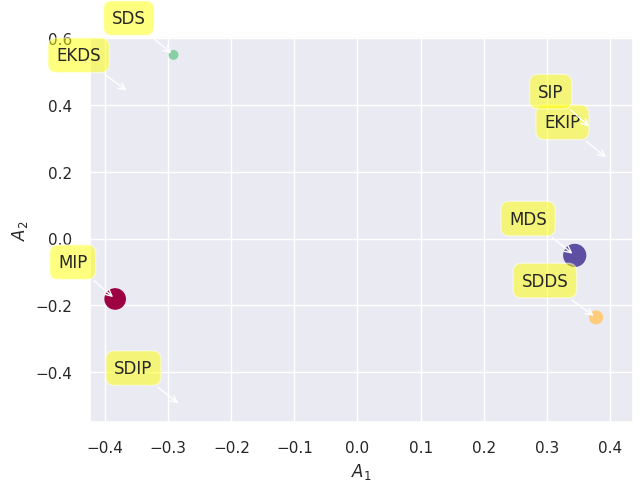

In [94]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

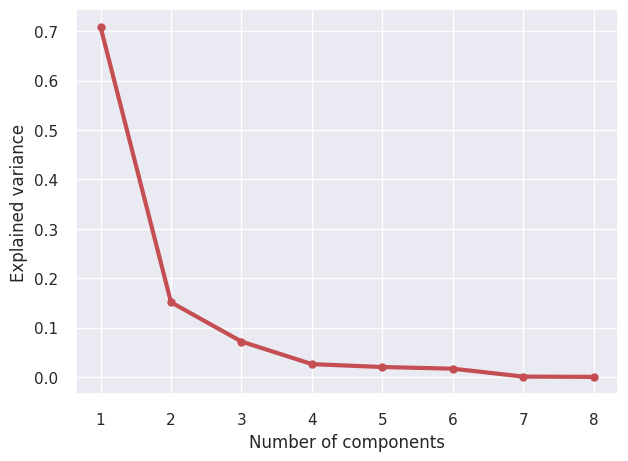

In [95]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

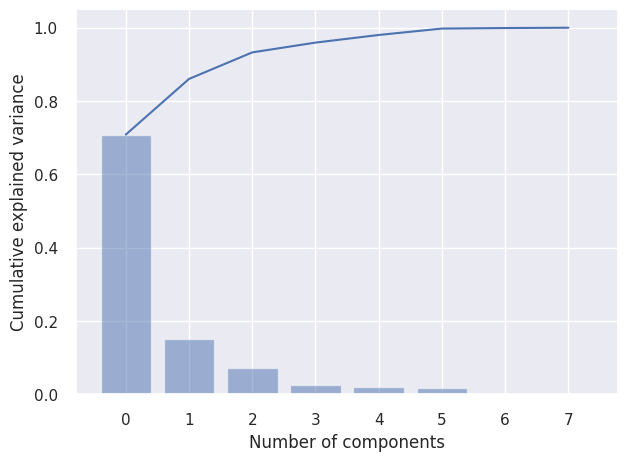

In [96]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

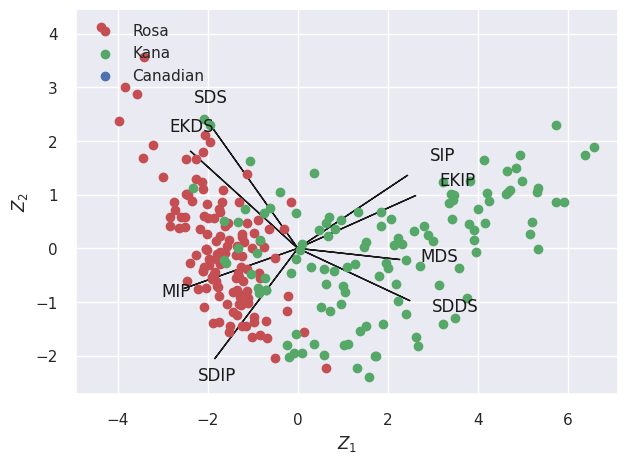

In [97]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [98]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [100]:
out['PC']

PC1       PC2       PC3       PC4
0   -2.090344 -1.095357  0.230375 -0.236532
1   -2.108940 -0.424632  0.839359 -1.089306
2   -0.845912  0.140257 -0.865905  0.447786
3   -1.886567 -1.389980  0.234824 -0.409619
4   -1.960337  1.980673  0.291079  0.097478
..        ...       ...       ...       ...
245 -1.133608 -0.376049 -0.299296 -0.267693
246 -2.167216  0.362443  0.675371 -0.600521
247 -2.106215  1.799052  0.071426  0.441318
248 -2.511706  0.393081  0.761460 -0.370692
249 -2.006493  0.832693  0.188024  0.042846

[250 rows x 4 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [98.02%] of the variance'}, xlabel='PC1 (70.8% expl.var)', ylabel='PC2 (15.1% expl.var)'>)

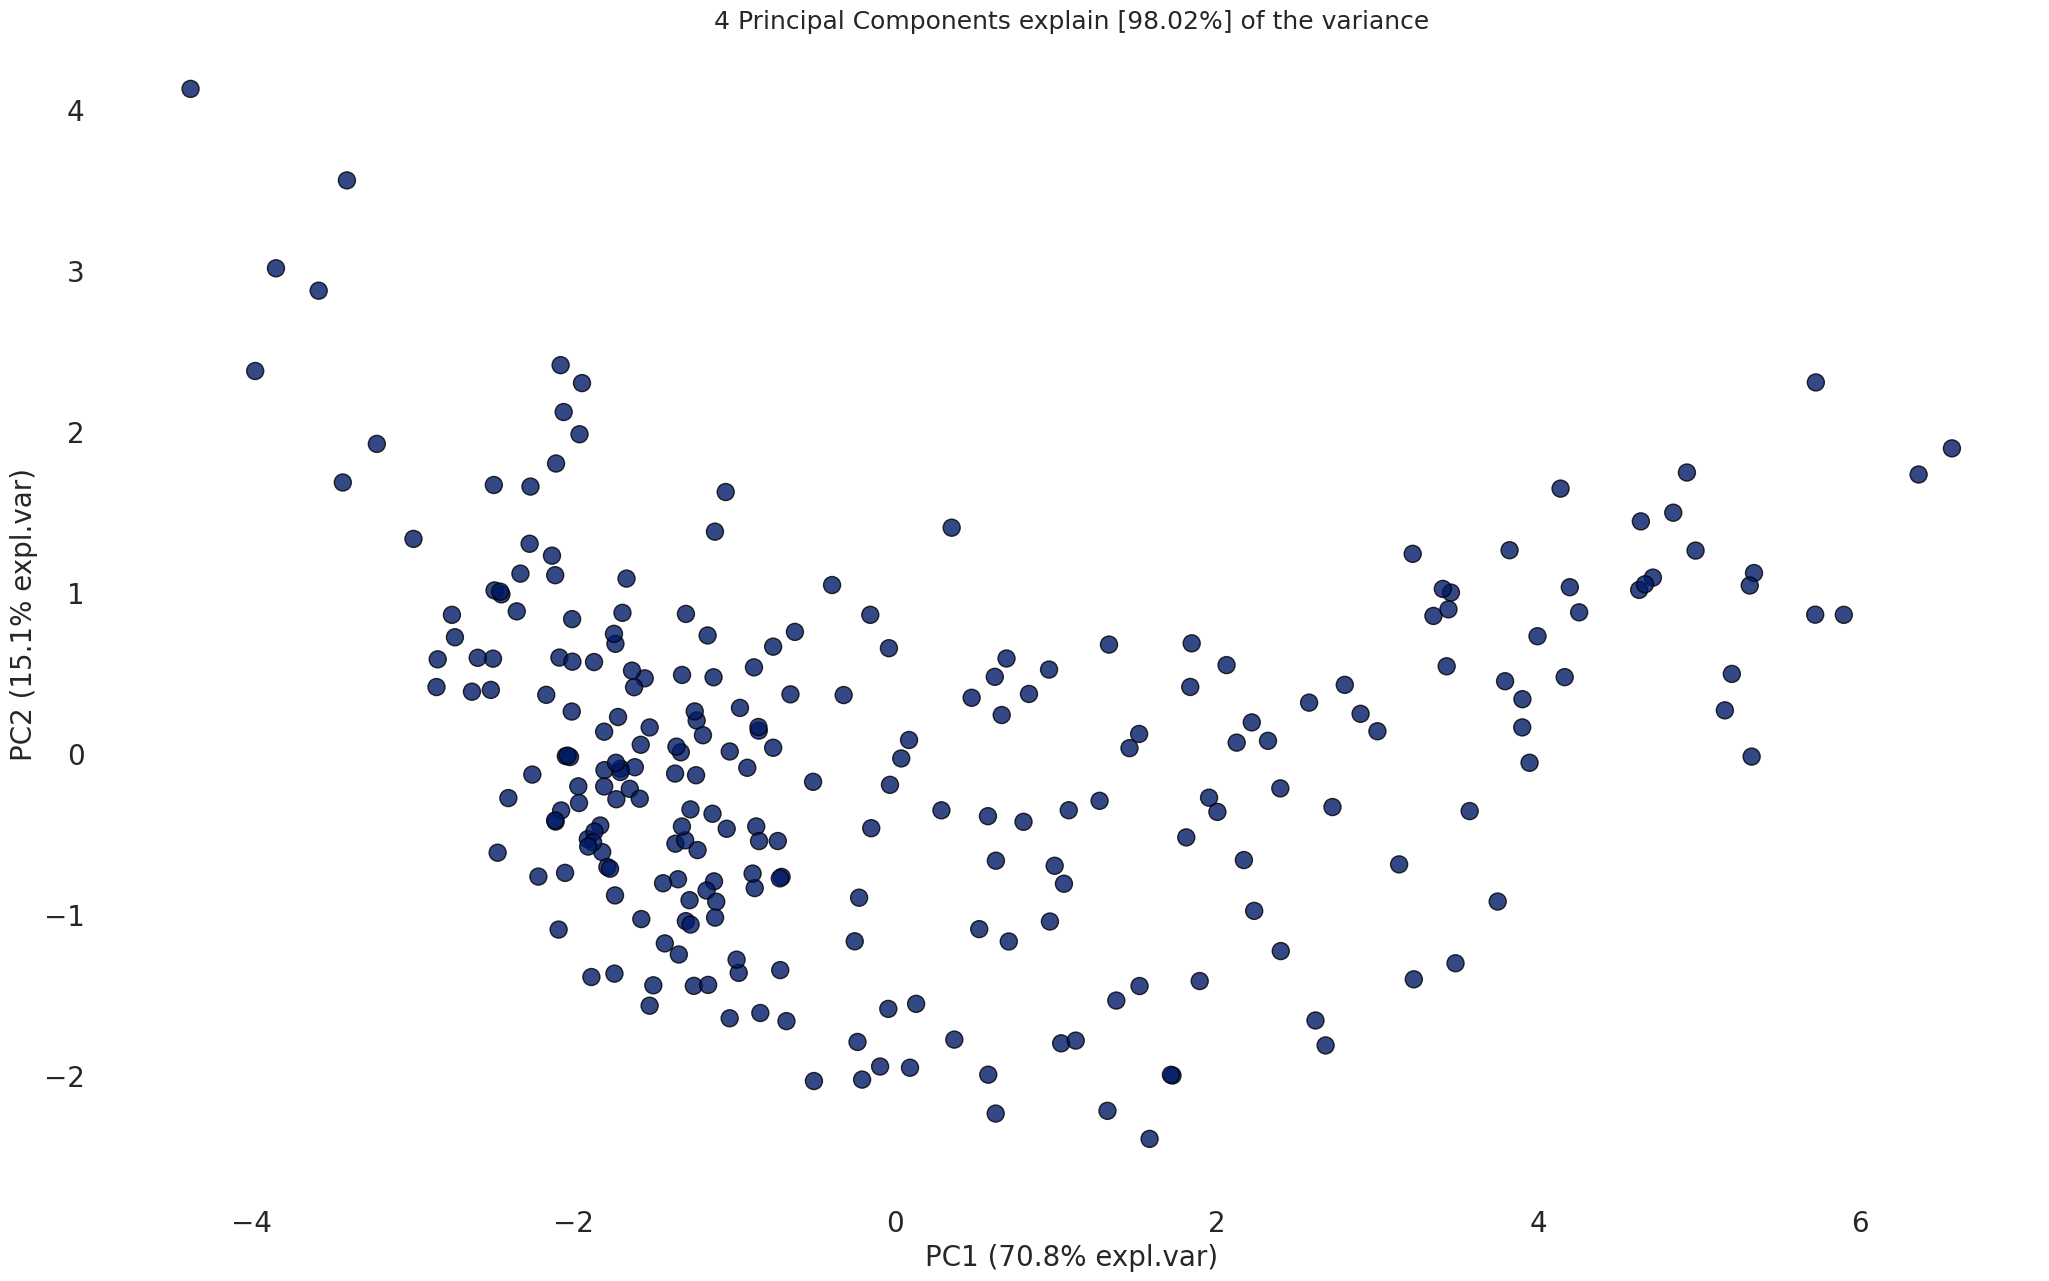

In [101]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [102]:
A = out['loadings'].T

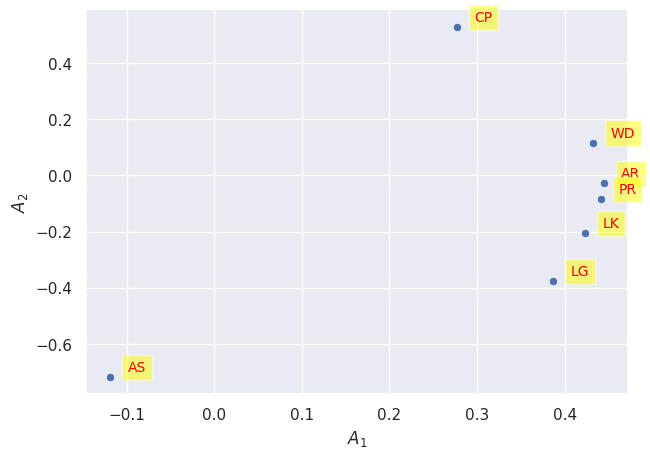

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

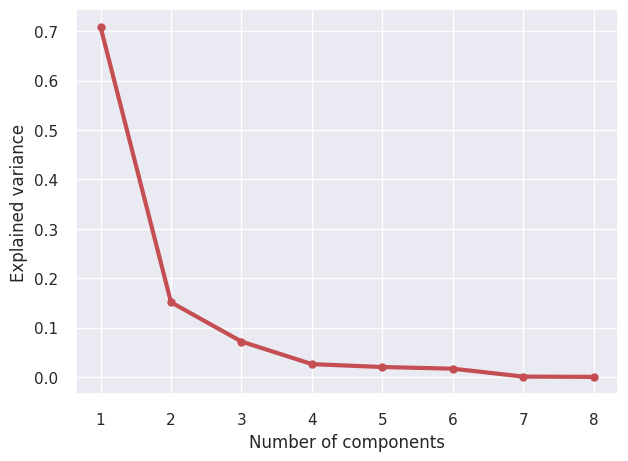

In [103]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

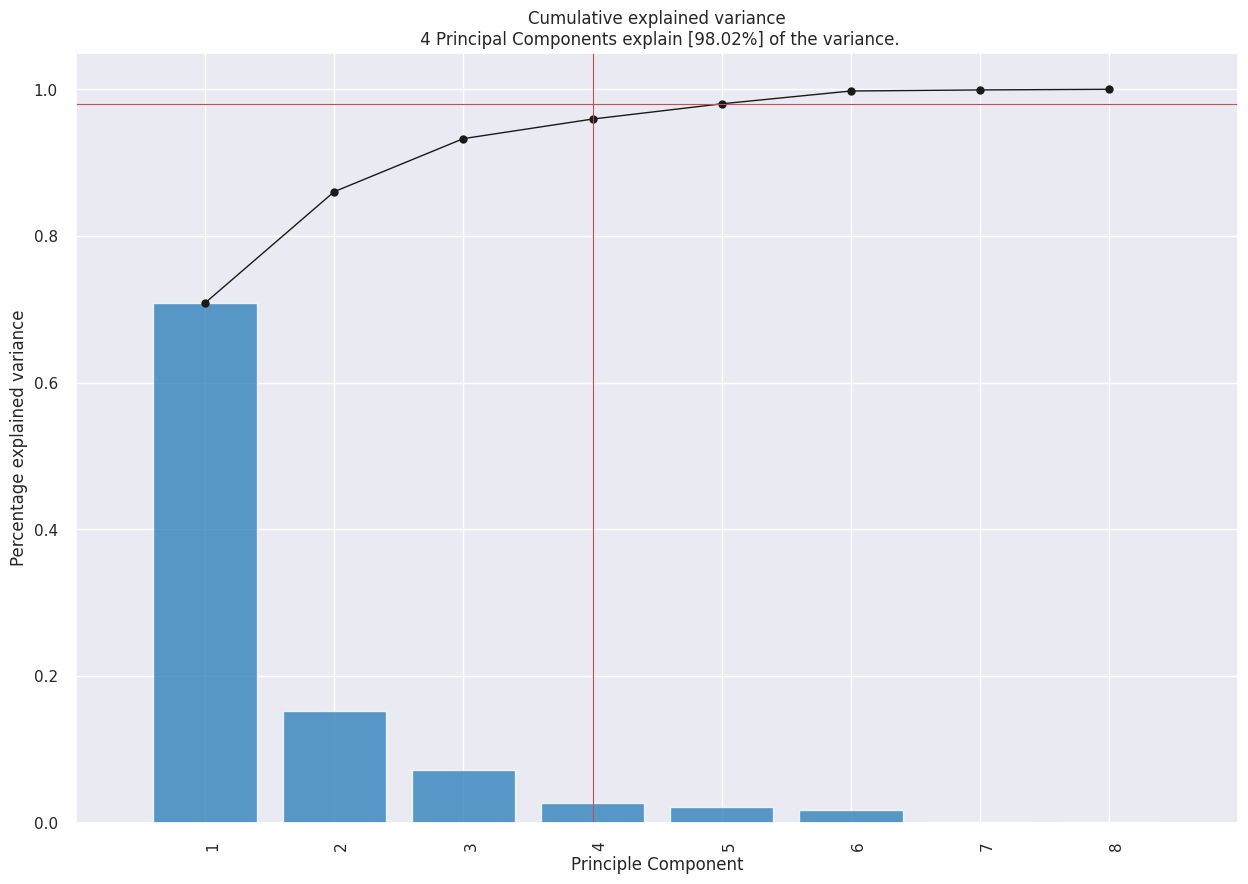

<Figure size 700x500 with 0 Axes>

In [104]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


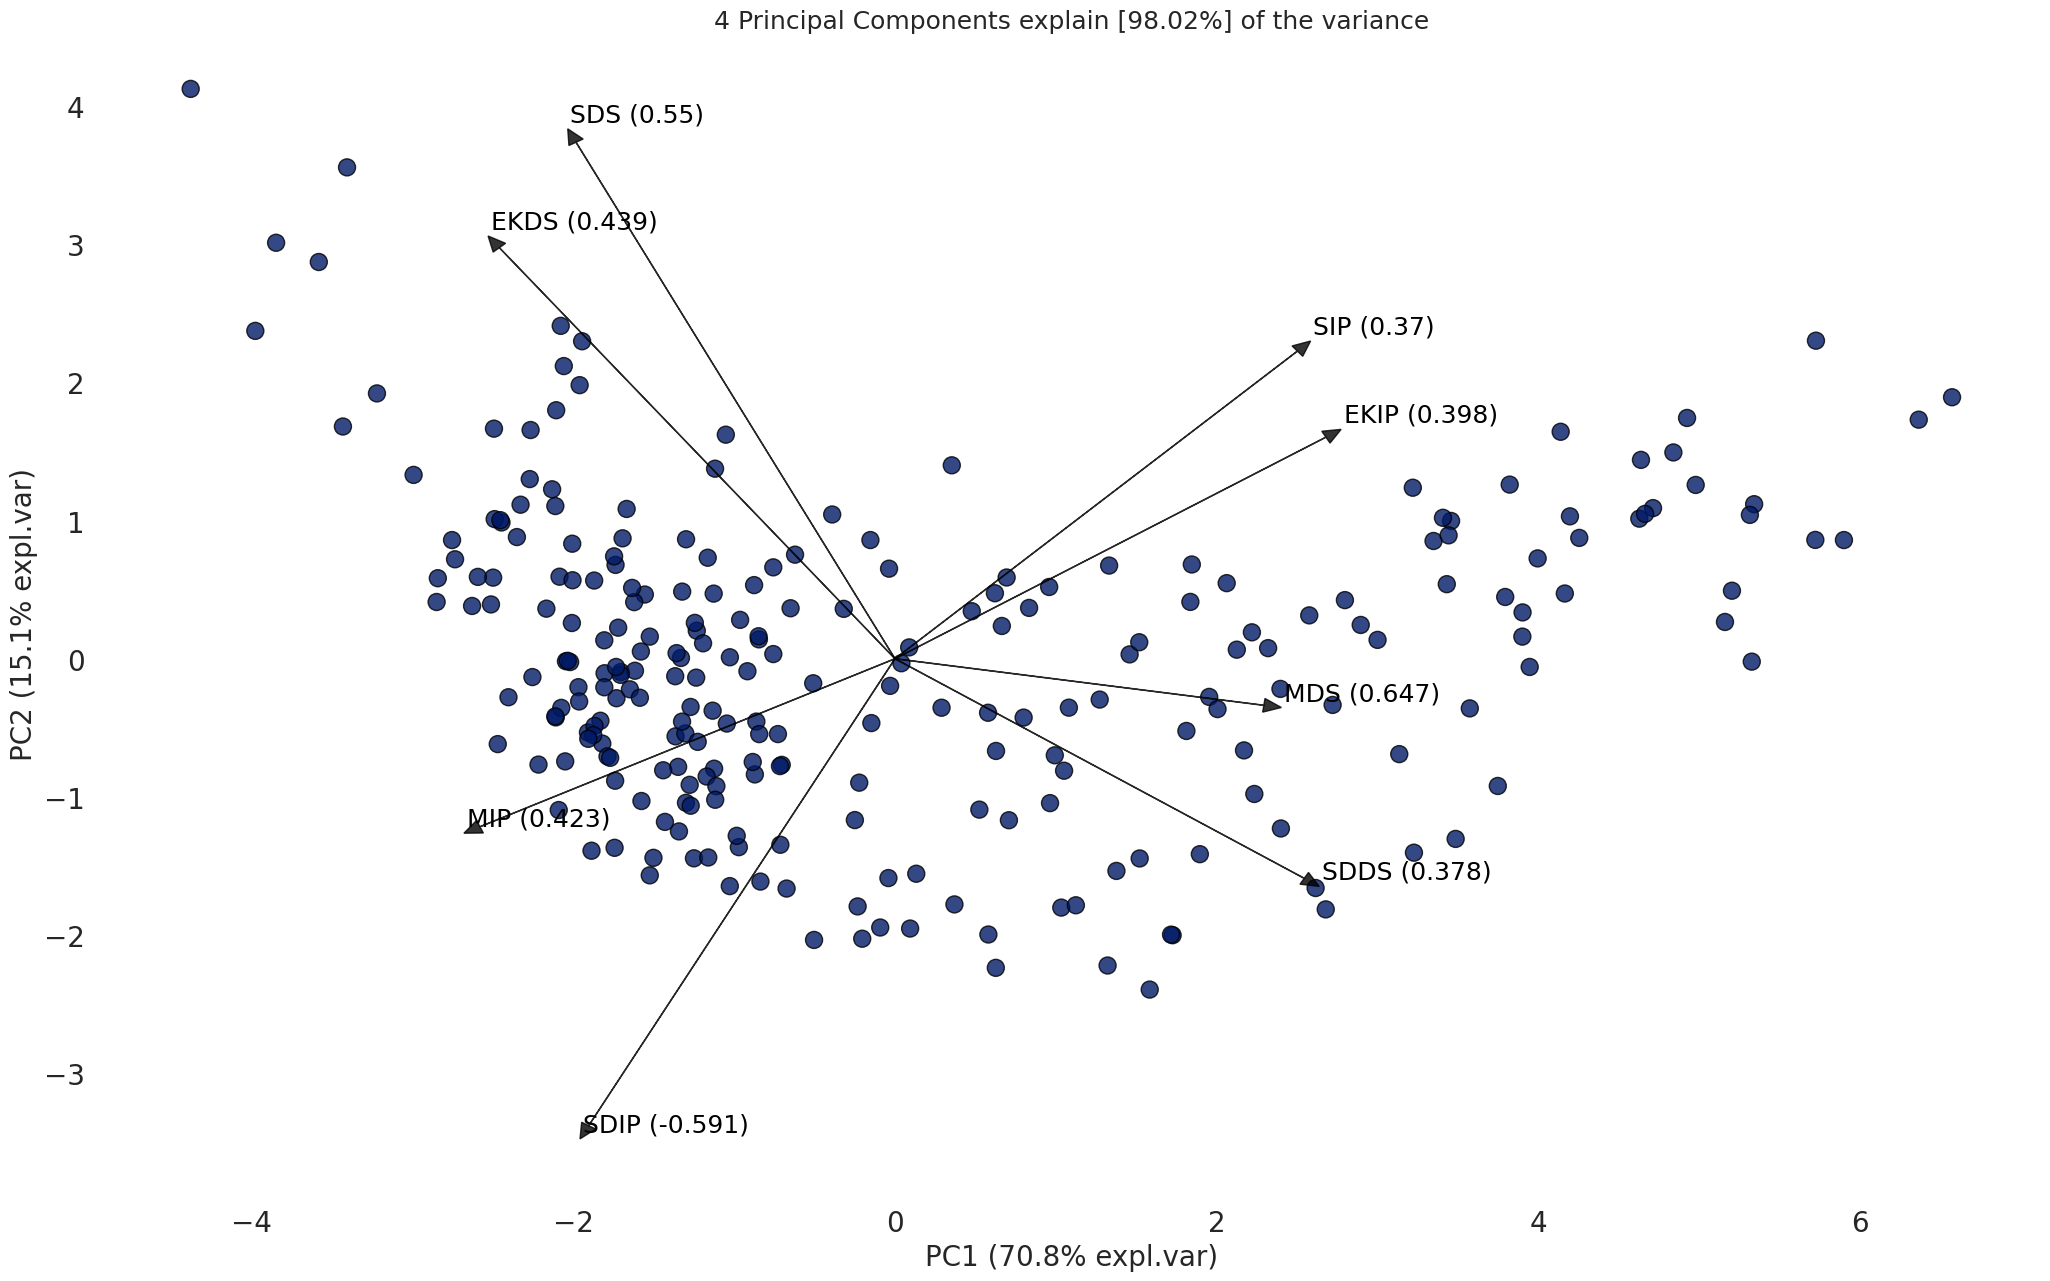

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [98.02%] of the variance'}, xlabel='PC1 (70.8% expl.var)', ylabel='PC2 (15.1% expl.var)'>)

In [105]:
model.biplot(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook. The enable_colab() function in PyCaret is used to install and configure all the necessary dependencies to use PyCaret in Google Colab.

In [106]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [33]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (225, 9)
Unseen Data For Predictions: (25, 9)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [108]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (225, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (157, 8)
12                    Transformed Test Set           (68, 8)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              15a3
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing all Machine Learning Models**

In [109]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9300  0.9683  0.9054  0.9514   
rf               Random Forest Classifier    0.9233  0.9663  0.8929  0.9500   
lr                    Logistic Regression    0.9175  0.9741  0.8679  0.9583   
knn                K Neighbors Classifier    0.9175  0.9337  0.8804  0.9528   
nb                            Naive Bayes    0.9175  0.9482  0.8679  0.9583   
qda       Quadratic Discriminant Analysis    0.9113  0.9483  0.8554  0.9607   
gbc          Gradient Boosting Classifier    0.9113  0.9614  0.8804  0.9403   
xgboost         Extreme Gradient Boosting    0.9108  0.9618  0.8946  0.9278   
lightgbm  Light Gradient Boosting Machine    0.9108  0.9723  0.8946  0.9278   
ridge                    Ridge Classifier    0.9050  0.0000  0.8161  0.9875   
lda          Linear Discriminant Analysis    0.8988  0.9631  0.8036  0.9857   
ada                  Ada Boost Classifier    0.8921  0.9670  0.8696  0.9153   
svm                   SVM - Linear Kernel    0.8858  0.0000  0.7768  0.9857   
dt               Decision Tree Classifier    0.8612  0.8603  0.8554  0.8732   
dummy                    Dummy Classifier    0.5225  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
et        0.9237  0.8588  0.8653     0.179  
rf        0.9171  0.8455  0.8514     0.344  
lr        0.9077  0.8338  0.8405     0.390  
knn       0.9115  0.8341  0.8415     0.018  
nb        0.9069  0.8338  0.8419     0.014  
qda       0.8990  0.8213  0.8325     0.020  
gbc       0.9061  0.8213  0.8269     0.130  
xgboost   0.9072  0.8209  0.8266     0.045  
lightgbm  0.9072  0.8209  0.8266     0.120  
ridge     0.8868  0.8084  0.8251     0.011  
lda       0.8793  0.7959  0.8131     0.025  
ada       0.8862  0.7834  0.7922     0.163  
svm       0.8574  0.7699  0.7925     0.014  
dt        0.8582  0.7217  0.7303     0.014  
dummy     0.0000  0.0000  0.0000     0.016

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [110]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [111]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  0.9286  0.8571  1.0000  0.9231  0.8710  0.8783
1       0.8750  0.8889  1.0000  0.7778  0.8750  0.7538  0.7778
2       0.8750  0.8750  0.8750  0.8750  0.8750  0.7500  0.7500
3       0.6875  0.6875  0.7500  0.6667  0.7059  0.3750  0.3780
4       0.8125  0.8125  0.8750  0.7778  0.8235  0.6250  0.6299
5       0.8125  0.8125  0.7500  0.8571  0.8000  0.6250  0.6299
6       0.8125  0.8125  0.8750  0.7778  0.8235  0.6250  0.6299
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9333  0.9286  0.8571  1.0000  0.9231  0.8649  0.8729
9       0.8667  0.8571  0.7143  1.0000  0.8333  0.7273  0.7559
Mean    0.8612  0.8603  0.8554  0.8732  0.8582  0.7217  0.7303
SD      0.0825  0.0816  0.0923  0.1160  0.0766  0.1644  0.1651

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [112]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [113]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  1.0000  0.8571  1.0000  0.9231  0.8710  0.8783
1       0.9375  0.9444  1.0000  0.8750  0.9333  0.8750  0.8819
2       0.9375  0.9922  0.8750  1.0000  0.9333  0.8750  0.8819
3       0.6875  0.7969  0.6250  0.7143  0.6667  0.3750  0.3780
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8125  0.8438  0.8750  0.7778  0.8235  0.6250  0.6299
6       0.8750  0.8672  0.8750  0.8750  0.8750  0.7500  0.7500
7       0.9333  1.0000  0.8571  1.0000  0.9231  0.8649  0.8729
8       0.9333  0.9018  0.8571  1.0000  0.9231  0.8649  0.8729
9       0.8667  0.8214  0.7143  1.0000  0.8333  0.7273  0.7559
Mean    0.8921  0.9168  0.8536  0.9242  0.8834  0.7828  0.7902
SD      0.0839  0.0766  0.1077  0.1024  0.0874  0.1676  0.1675

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [114]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

In [115]:
#Update statmodels
#!pip3 install statsmodels --upgrade

How to analyze model performance using various plots

In [116]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [117]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  1.0000  0.8571  1.0000  0.9231  0.8710  0.8783
1       0.9375  0.9921  1.0000  0.8750  0.9333  0.8750  0.8819
2       0.9375  0.9062  0.8750  1.0000  0.9333  0.8750  0.8819
3       0.8125  0.8672  0.8750  0.7778  0.8235  0.6250  0.6299
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8750  0.8906  0.7500  1.0000  0.8571  0.7500  0.7746
6       0.8750  0.9219  0.8750  0.8750  0.8750  0.7500  0.7500
7       0.9333  0.9554  0.8571  1.0000  0.9231  0.8649  0.8729
8       0.9333  0.9107  0.8571  1.0000  0.9231  0.8649  0.8729
9       0.9333  0.8929  0.8571  1.0000  0.9231  0.8649  0.8729
Mean    0.9175  0.9337  0.8804  0.9528  0.9115  0.8341  0.8415
SD      0.0484  0.0469  0.0692  0.0764  0.0462  0.0964  0.0950

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [118]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       0.9375  0.9841  0.8571    1.0  0.9231  0.8710  0.8783
1       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
2       0.9375  0.9219  0.8750    1.0  0.9333  0.8750  0.8819
3       0.9375  0.9141  0.8750    1.0  0.9333  0.8750  0.8819
4       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
5       0.8750  0.9219  0.7500    1.0  0.8571  0.7500  0.7746
6       0.8750  0.8438  0.7500    1.0  0.8571  0.7500  0.7746
7       0.9333  0.9196  0.8571    1.0  0.9231  0.8649  0.8729
8       0.9333  0.9196  0.8571    1.0  0.9231  0.8649  0.8729
9       0.9333  0.9286  0.8571    1.0  0.9231  0.8649  0.8729
Mean    0.9362  0.9354  0.8679    1.0  0.9273  0.8716  0.8810
SD      0.0396  0.0453  0.0795    0.0  0.0453  0.0792  0.0715

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [119]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [120]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  1.0000  0.8571  1.0000  0.9231  0.8710  0.8783
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9375  1.0000  0.8750  1.0000  0.9333  0.8750  0.8819
3       0.7500  0.9062  0.6250  0.8333  0.7143  0.5000  0.5164
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8750  0.9531  0.8750  0.8750  0.8750  0.7500  0.7500
6       0.8750  0.9531  0.8750  0.8750  0.8750  0.7500  0.7500
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9333  1.0000  0.8571  1.0000  0.9231  0.8649  0.8729
9       0.8667  0.9286  0.7143  1.0000  0.8333  0.7273  0.7559
Mean    0.9175  0.9741  0.8679  0.9583  0.9077  0.8338  0.8405
SD      0.0746  0.0340  0.1163  0.0645  0.0847  0.1496  0.1446

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [121]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [122]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  1.0000  0.8571  1.0000  0.9231  0.8710  0.8783
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9375  1.0000  0.8750  1.0000  0.9333  0.8750  0.8819
3       0.7500  0.9219  0.6250  0.8333  0.7143  0.5000  0.5164
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8750  0.9531  0.8750  0.8750  0.8750  0.7500  0.7500
6       0.8750  0.9531  0.8750  0.8750  0.8750  0.7500  0.7500
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9333  1.0000  0.8571  1.0000  0.9231  0.8649  0.8729
9       0.8667  0.9464  0.7143  1.0000  0.8333  0.7273  0.7559
Mean    0.9175  0.9775  0.8679  0.9583  0.9077  0.8338  0.8405
SD      0.0746  0.0288  0.1163  0.0645  0.0847  0.1496  0.1446

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [123]:
tuned_lr

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [125]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  1.0000  0.8571  1.0000  0.9231  0.8710  0.8783
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9375  1.0000  0.8750  1.0000  0.9333  0.8750  0.8819
3       0.8750  0.9062  0.8750  0.8750  0.8750  0.7500  0.7500
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8750  0.9219  0.8750  0.8750  0.8750  0.7500  0.7500
6       0.8750  0.9062  0.8750  0.8750  0.8750  0.7500  0.7500
7       0.9333  1.0000  1.0000  0.8750  0.9333  0.8673  0.8750
8       0.9333  0.9643  0.8571  1.0000  0.9231  0.8649  0.8729
9       0.8667  0.9643  0.7143  1.0000  0.8333  0.7273  0.7559
Mean    0.9233  0.9663  0.8929  0.9500  0.9171  0.8455  0.8514
SD      0.0475  0.0386  0.0838  0.0612  0.0517  0.0956  0.0932

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [126]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  1.0000  0.8571  1.0000  0.9231  0.8710  0.8783
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9375  1.0000  0.8750  1.0000  0.9333  0.8750  0.8819
3       0.8750  0.9062  0.8750  0.8750  0.8750  0.7500  0.7500
4       0.9375  0.9844  0.8750  1.0000  0.9333  0.8750  0.8819
5       0.8750  0.9375  0.8750  0.8750  0.8750  0.7500  0.7500
6       0.8750  0.9219  0.8750  0.8750  0.8750  0.7500  0.7500
7       0.9333  1.0000  1.0000  0.8750  0.9333  0.8673  0.8750
8       0.9333  0.9643  0.8571  1.0000  0.9231  0.8649  0.8729
9       0.8667  0.9464  0.7143  1.0000  0.8333  0.7273  0.7559
Mean    0.9171  0.9661  0.8804  0.9500  0.9104  0.8330  0.8396
SD      0.0406  0.0342  0.0758  0.0612  0.0443  0.0818  0.0802

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [127]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [128]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  1.0000  0.8571  1.0000  0.9231  0.8710  0.8783
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9375  1.0000  0.8750  1.0000  0.9333  0.8750  0.8819
3       0.8750  0.9062  0.8750  0.8750  0.8750  0.7500  0.7500
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8750  0.9375  0.8750  0.8750  0.8750  0.7500  0.7500
6       0.8750  0.9688  0.8750  0.8750  0.8750  0.7500  0.7500
7       0.9333  1.0000  1.0000  0.8750  0.9333  0.8673  0.8750
8       0.9333  0.9643  0.8571  1.0000  0.9231  0.8649  0.8729
9       0.8667  0.9643  0.7143  1.0000  0.8333  0.7273  0.7559
Mean    0.9233  0.9741  0.8929  0.9500  0.9171  0.8455  0.8514
SD      0.0475  0.0309  0.0838  0.0612  0.0517  0.0956  0.0932

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [129]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [130]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [131]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (250, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (174, 3)
12                    Transformed Test Set           (76, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              b9b0
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [132]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.9307  0.9625  0.8778  0.9732   
et                 Extra Trees Classifier    0.9199  0.9536  0.8792  0.9489   
qda       Quadratic Discriminant Analysis    0.9196  0.9511  0.8778  0.9521   
lightgbm  Light Gradient Boosting Machine    0.9075  0.9436  0.8903  0.9149   
rf               Random Forest Classifier    0.8964  0.9412  0.8556  0.9308   
gbc          Gradient Boosting Classifier    0.8961  0.9529  0.8542  0.9297   
xgboost         Extreme Gradient Boosting    0.8961  0.9367  0.8667  0.9125   
ridge                    Ridge Classifier    0.8908  0.0000  0.7833  0.9800   
lda          Linear Discriminant Analysis    0.8908  0.9581  0.7833  0.9800   
knn                K Neighbors Classifier    0.8905  0.9380  0.8542  0.9118   
ada                  Ada Boost Classifier    0.8859  0.9484  0.8556  0.9052   
nb                            Naive Bayes    0.8856  0.9452  0.8319  0.9268   
svm                   SVM - Linear Kernel    0.8791  0.0000  0.8417  0.9061   
dt               Decision Tree Classifier    0.8618  0.8603  0.8417  0.8710   
dummy                    Dummy Classifier    0.5288  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lr        0.9207  0.8598  0.8662     0.016  
et        0.9096  0.8383  0.8441     0.172  
qda       0.9096  0.8375  0.8451     0.020  
lightgbm  0.8995  0.8141  0.8183     0.025  
rf        0.8819  0.7914  0.8043     0.363  
gbc       0.8832  0.7905  0.8016     0.138  
xgboost   0.8851  0.7907  0.7966     0.043  
ridge     0.8643  0.7783  0.7976     0.017  
lda       0.8643  0.7783  0.7976     0.013  
knn       0.8769  0.7792  0.7869     0.020  
ada       0.8759  0.7706  0.7767     0.163  
nb        0.8709  0.7696  0.7810     0.013  
svm       0.8668  0.7564  0.7654     0.012  
dt        0.8502  0.7218  0.7299     0.012  
dummy     0.0000  0.0000  0.0000     0.016

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [133]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [134]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8889  0.8875  0.7500  1.0000  0.8571  0.7692  0.7906
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.8889  0.9877  0.7778  1.0000  0.8750  0.7778  0.7977
4       0.9412  1.0000  0.8750  1.0000  0.9333  0.8811  0.8874
5       0.9412  0.9861  0.8750  1.0000  0.9333  0.8811  0.8874
6       0.8824  0.9583  0.8750  0.8750  0.8750  0.7639  0.7639
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9412  0.9722  0.8750  1.0000  0.9333  0.8811  0.8874
9       0.8235  0.8333  0.7500  0.8571  0.8000  0.6434  0.6480
Mean    0.9307  0.9625  0.8778  0.9732  0.9207  0.8598  0.8662
SD      0.0566  0.0541  0.0935  0.0537  0.0649  0.1146  0.1112

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [135]:
tuned_best_model_pca

LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [136]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties. 

SHAP is a Python library for model interpretation and feature importance analysis, and it provides a variety of tools for explaining the output of machine learning models. The library is based on the Shapley value, a concept from cooperative game theory that assigns a value to each player in a game based on their contribution to the overall outcome.

In [137]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

In [139]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8889  0.9062  0.7500  1.0000  0.8571  0.7692  0.7906
2       0.9444  1.0000  1.0000  0.9000  0.9474  0.8889  0.8944
3       0.7778  0.8951  0.5556  1.0000  0.7143  0.5556  0.6202
4       0.9412  0.9722  0.8750  1.0000  0.9333  0.8811  0.8874
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.7647  0.8889  0.8750  0.7000  0.7778  0.5342  0.5494
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8824  0.9444  0.8750  0.8750  0.8750  0.7639  0.7639
9       0.7647  0.8056  0.6250  0.8333  0.7143  0.5211  0.5367
Mean    0.8964  0.9412  0.8556  0.9308  0.8819  0.7914  0.8043
SD      0.0925  0.0627  0.1546  0.0978  0.1079  0.1855  0.1738

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [140]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8889  0.8625  0.7500  1.0000  0.8571  0.7692  0.7906
2       0.9444  1.0000  1.0000  0.9000  0.9474  0.8889  0.8944
3       0.8333  0.8333  0.6667  1.0000  0.8000  0.6667  0.7071
4       0.9412  0.9375  0.8750  1.0000  0.9333  0.8811  0.8874
5       0.9412  1.0000  0.8750  1.0000  0.9333  0.8811  0.8874
6       0.8235  0.9167  0.8750  0.7778  0.8235  0.6483  0.6528
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9412  0.9306  0.8750  1.0000  0.9333  0.8811  0.8874
9       0.7647  0.8056  0.6250  0.8333  0.7143  0.5211  0.5367
Mean    0.9078  0.9286  0.8542  0.9511  0.8942  0.8138  0.8244
SD      0.0743  0.0701  0.1281  0.0795  0.0880  0.1501  0.1434

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.2,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=110, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.2,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=110, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


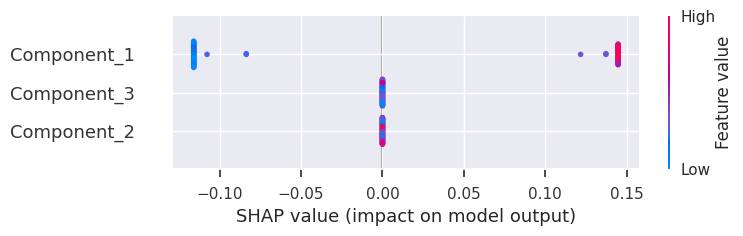

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [143]:
interpret_model(tuned_rf_pca, plot='summary')

In [142]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [144]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.2,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=110, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [145]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.2,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=110, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
